# Imports lib

In [1]:
pip install --upgrade scikit-learn xgboost lightgbm

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.2 MB 18.3 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.2 MB 18.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.2 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 16.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 4.2/124.9 MB 20.9 MB/s eta 0:00:06
   --- ------------------------------------ 9.4/124.9 MB 21.7 MB/s eta 0:00:06
   ---- ----------------------------------- 13.4/124.9 MB 22.1 MB/s eta 0:00:06
   ----- ---------------------------------- 18.1/124.9 MB 21.9 MB/s eta 0:00:05
   ------ --------------------------------- 21.5/124.9 MB 20.6 MB/s eta 0:00:06
   ------- -------------------------------- 24.9/124.9 MB 20.0 MB/s eta 0:00:06
   --------- ------------------------------ 29.4/124.9 MB 20.0 MB/s

In [2]:
# Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Load Datasets

In [3]:
# laod dataset
file1 = ('dataset/bank/bank-full.csv')
file2 = ('dataset/bank-additional/bank-additional/bank-additional-full.csv')

df1 = pd.read_csv(file1, delimiter=';')
df2 = pd.read_csv(file2, delimiter=';')

In [4]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df2['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

# Explore Dataset Charcterestics

In [7]:
print(df1.info())
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
(45211, 17)


In [8]:
print(df2.info())
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Distribution of CLass

In [9]:
# chekc the class distribution of the target variables
class_distribution = df2['y'].value_counts()

print(class_distribution)

yes = 0
no = 0
for value in df2['y']:
    if ( value == 'no'):
        yes += 1
    else:
        no +=1
print(f'occurance of Y and N (scale_pos_weight): {yes/no:.2f}')       

y
no     36548
yes     4640
Name: count, dtype: int64
occurance of Y and N (scale_pos_weight): 7.88


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Training our gradient boosting classifier with bank marketing dataset. (bank_full.csv)


CLASSIFICATION MATRIX
------------------------
GBC Accuracy: 0.9068
GBC Precision: 0.6702
GBC Recall: 0.3997
GBC F1-score: 0.5008


<Figure size 1000x1000 with 0 Axes>

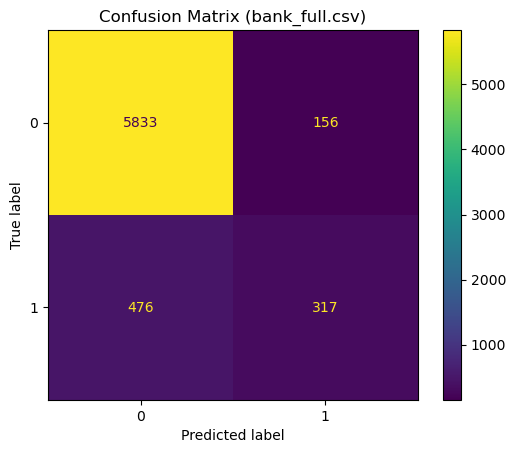

In [11]:
# Training Gradient Boosting Classifier (G_B_C)

# identify the categorical columns 
categorical_cols = df1.select_dtypes(include=['object']).columns

# View categorical columns
# for idx, i in enumerate(categorical_cols):  # Corrected syntax
#     print(idx+1, i)


# remove the target cols from the categorical col list
categorical_cols = categorical_cols[categorical_cols != 'y']

# apply one-hot-encoding to the categorical cols
df1_copy = df1.copy()
df_encoded = pd.get_dummies(df1_copy, columns=categorical_cols, drop_first=True)

x = df_encoded.drop(columns='y')
y = df_encoded['y']

# splitting the data 
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.15, stratify=y)

# encode the label
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.fit_transform(test_y)

# instantiate gradient boosting regressor (INPUT PARAMETER)
n_estimators = 300  
learning_rate = 0.05
random_state = 42
max_features = 5

# Instantiate GradientBoostingClassifier with keyword arguments
gbc = GradientBoostingClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    random_state=random_state,
    max_features=max_features
)

# Fit to training set
gbc.fit(train_X, train_y)

# predict on test set
pred_y = gbc.predict(test_X)


# Calculate evaluation metrics
acc = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y, average='binary')
recall = recall_score(test_y, pred_y, average='binary')
f1 = f1_score(test_y, pred_y, average='binary')

# Store results in a list
result = [("GBC Accuracy", acc), ("GBC Precision", precision), ("GBC Recall", recall), ("GBC F1-score", f1)]

# Display results properly
print("\nCLASSIFICATION MATRIX")
print("------------------------")
for metric, value in result:
    print(f"{metric}: {value:.4f}")

# confusion matrix
cm = confusion_matrix(test_y, pred_y)

# Create and display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
display.plot()
plt.title('Confusion Matrix (bank_full.csv)')

plt.show()

### plt.barh(range(len(importance_scores)), importance_scores[sorted_idx], align="center")

   - plt.barh(...) creates a horizontal bar chart (barh means "bar horizontal").

   - range(len(importance_scores)): Generates indices for each feature.

   - importance_scores[sorted_idx]: Sorts the importance scores (assuming sorted_idx contains the indices of features sorted by importance).

   - align="center": Centers bars along the y-axis.


# Using (bank_full.csv) Dataset 

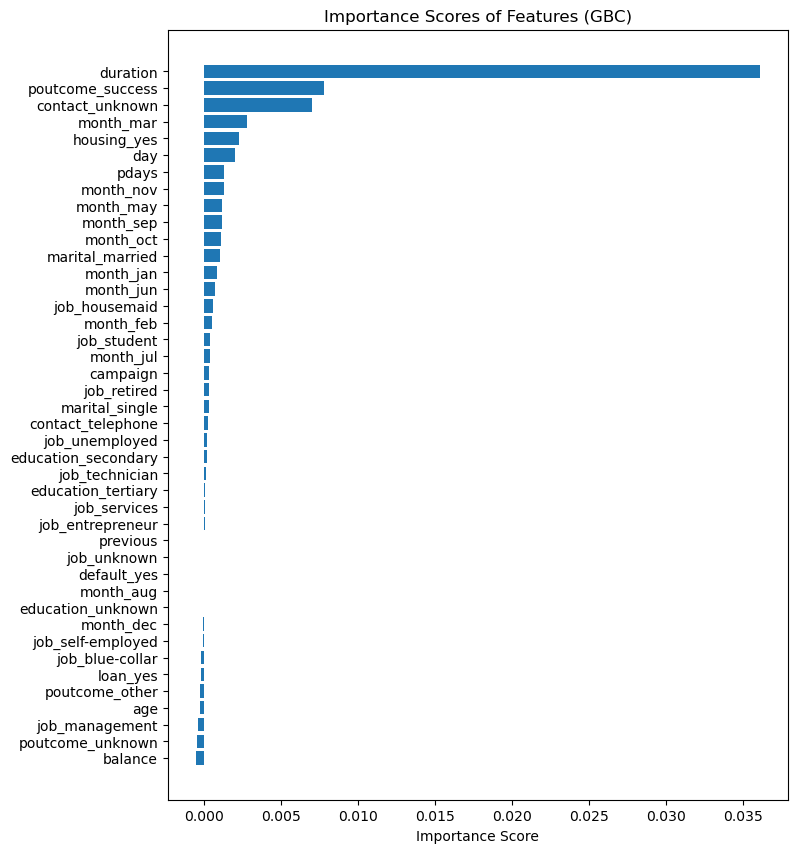

In [12]:
# calculate permuatation importance
n_repeats = 10
random_state = 42
results = permutation_importance(gbc, test_X, test_y, n_repeats=n_repeats, random_state=random_state)

# get the importance score for each features 
importance_scores = results.importances_mean

# sort the importance scores in descending order
sorted_idx = importance_scores.argsort()

# Create a horizontal bar plot
plt.figure(figsize=(8, 10))
plt.barh(range(len(importance_scores)), importance_scores[sorted_idx], align="center")
plt.yticks(range(len(importance_scores)), x.columns[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Importance Scores of Features (GBC)")
plt.show()


# Training Gradient boosting classifier using bank marketing dataset with additional features (bank_additional_full.csv)


CLASSIFICATION MATRIX
------------------------
GBC Accuracy: 0.9128
GBC Precision: 0.6756
GBC Recall: 0.4339
GBC F1-score: 0.5284



<Figure size 1000x1000 with 0 Axes>

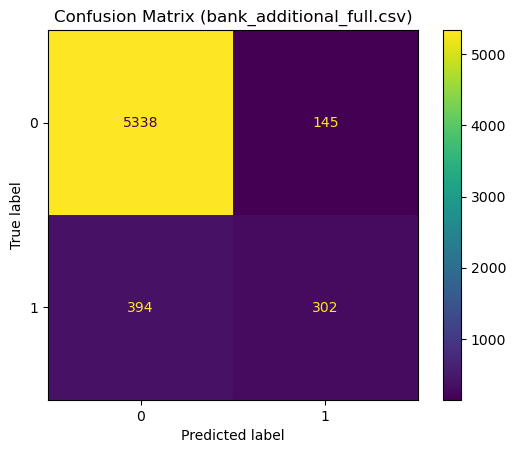

In [13]:
# id the categorical cols
df2_copy = df2.copy()
categorical_cols = df2_copy.select_dtypes(include=['object']).columns

# remove the target cols from the categoirical cols list 
categorical_cols = categorical_cols[categorical_cols != 'y']

# Apply one-hot encoding and drop target column 'y'
df2_copy = df2.copy()
categorical_cols = df2_copy.select_dtypes(include=['object']).columns

# Remove the target column from the categorical columns list 
categorical_cols = categorical_cols[categorical_cols != 'y']

# Apply one-hot-encoding to the categorical columns
df2_copy = pd.get_dummies(df2_copy, columns=categorical_cols, drop_first=True)

x = df2_copy.drop(columns='y')  # Features
y = df2_copy['y']  # Target variable

# Split training and testing data using stratification
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15, stratify=y)

# Label encoder for training and test data
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

# Instantiate Gradient Boosting Classifier with the specified parameters
n_estimators = 300  
learning_rate = 0.05
random_state = 42
max_features = 5
# Instantiate the model
gbc2 = GradientBoostingClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    random_state=random_state,
    max_features=max_features,
)

# Fit the model to the training set
gbc2.fit(train_x, train_y)

# Predict on the test set
pred_y = gbc2.predict(test_x)

# Calculate evaluation metrics
gbc2_acc = accuracy_score(test_y, pred_y)
gbc2_precision = precision_score(test_y, pred_y, average='binary')
gbc2_recall = recall_score(test_y, pred_y, average='binary')
gbc2_f1 = f1_score(test_y, pred_y, average='binary')

# Store results in a list
result = [("GBC Accuracy", gbc2_acc), ("GBC Precision", gbc2_precision), ("GBC Recall", gbc2_recall), ("GBC F1-score", gbc2_f1)]

# Display results properly
print("\nCLASSIFICATION MATRIX")
print("------------------------")
for metric, value in result:
    print(f"{metric}: {value:.4f}")
print()

# Confusion matrix
cm = confusion_matrix(test_y, pred_y)

# Create and display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
display.plot()
plt.title('Confusion Matrix (bank_additional_full.csv)')
plt.show() 

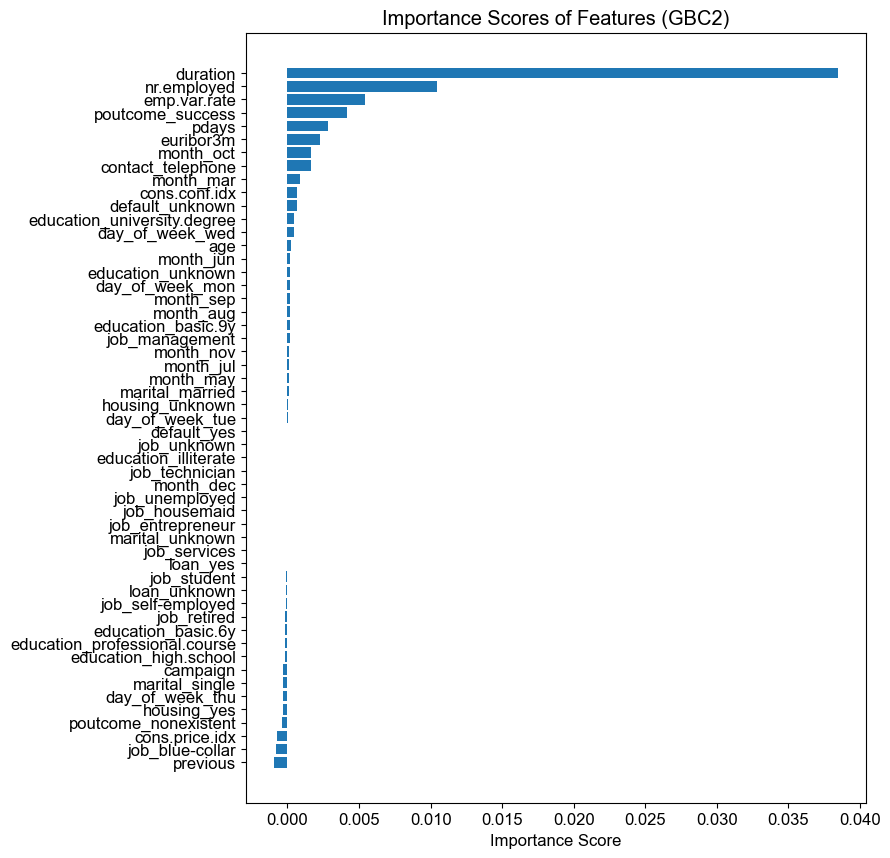

Top 10 Features by Permutation Importance:
duration: 0.0384
nr.employed: 0.0104
emp.var.rate: 0.0054
poutcome_success: 0.0042
pdays: 0.0028
euribor3m: 0.0023
month_oct: 0.0017
contact_telephone: 0.0016
month_mar: 0.0009
cons.conf.idx: 0.0007


In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set global font properties
rcParams['font.family'] = 'Arial'  # Change to your preferred font
rcParams['font.size'] = 12  # Adjust font size

# Calculate permutation importance
n_repeats = 10
random_state = 42
results = permutation_importance(gbc2, test_x, test_y, n_repeats=n_repeats, random_state=random_state)

# Get the importance score for each feature
importance_scores = results.importances_mean

# Sort the importance scores in descending order
sorted_idx = importance_scores.argsort()

# Create a horizontal bar plot
plt.figure(figsize=(8, 10))
plt.barh(range(len(importance_scores)), importance_scores[sorted_idx], align="center")
plt.yticks(range(len(importance_scores)), x.columns[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Importance Scores of Features (GBC2)")
plt.show()

# Print top features
print("Top 10 Features by Permutation Importance:")
for idx in sorted_idx[-10:][::-1]:
    print(f"{test_x.columns[idx]}: {importance_scores[idx]:.4f}")

# Training: Light gradient boosting machine (LightGBM) using (bank_additional_full.csv) dataset 

[LightGBM] [Info] Number of positive: 3944, number of negative: 31065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 35009, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112657 -> initscore=-2.063886
[LightGBM] [Info] Start training from score -2.063886

CLASSIFICATION MATRIX
------------------------
LightGBM Accuracy: 0.9081
LightGBM Precision: 0.5726
LightGBM Recall: 0.7256
LightGBM F1-score: 0.6401



<Figure size 1000x1000 with 0 Axes>

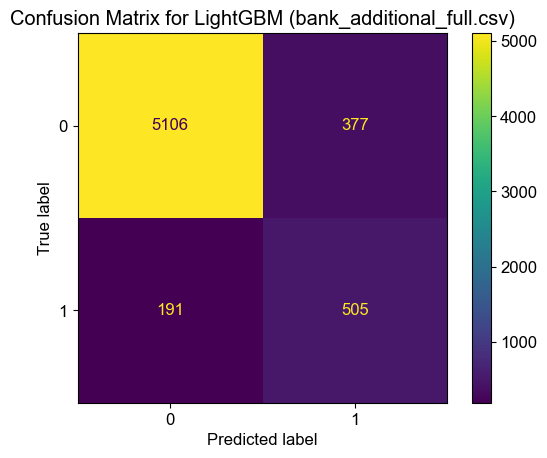

In [15]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the model with custom hyperparameters
lgb_model = lgb.LGBMClassifier(
    max_bin=255,
    metric='auc',
    random_state=42,
    scale_pos_weight=2
)

# Fit the model to the training data
lgb_model.fit(train_x, train_y)

# Make predictions on the test set
pred_y = lgb_model.predict(test_x)

# Calculate evaluation metrics
lgb_model_acc = accuracy_score(test_y, pred_y)
lgb_model_precision = precision_score(test_y, pred_y, average='binary')
lgb_model_recall = recall_score(test_y, pred_y, average='binary')
lgb_model_f1 = f1_score(test_y, pred_y, average='binary')

# Store results in a list
result = [("LightGBM Accuracy", lgb_model_acc), ("LightGBM Precision", lgb_model_precision), ("LightGBM Recall", lgb_model_recall), ("LightGBM F1-score", lgb_model_f1)]

# Display results properly
print("\nCLASSIFICATION MATRIX")
print("------------------------")
for metric, value in result:
    print(f"{metric}: {value:.4f}")
print()

# Confusion matrix
cm = confusion_matrix(test_y, pred_y)

# Create and display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
display.plot()
plt.title('Confusion Matrix for LightGBM (bank_additional_full.csv)')
plt.show()


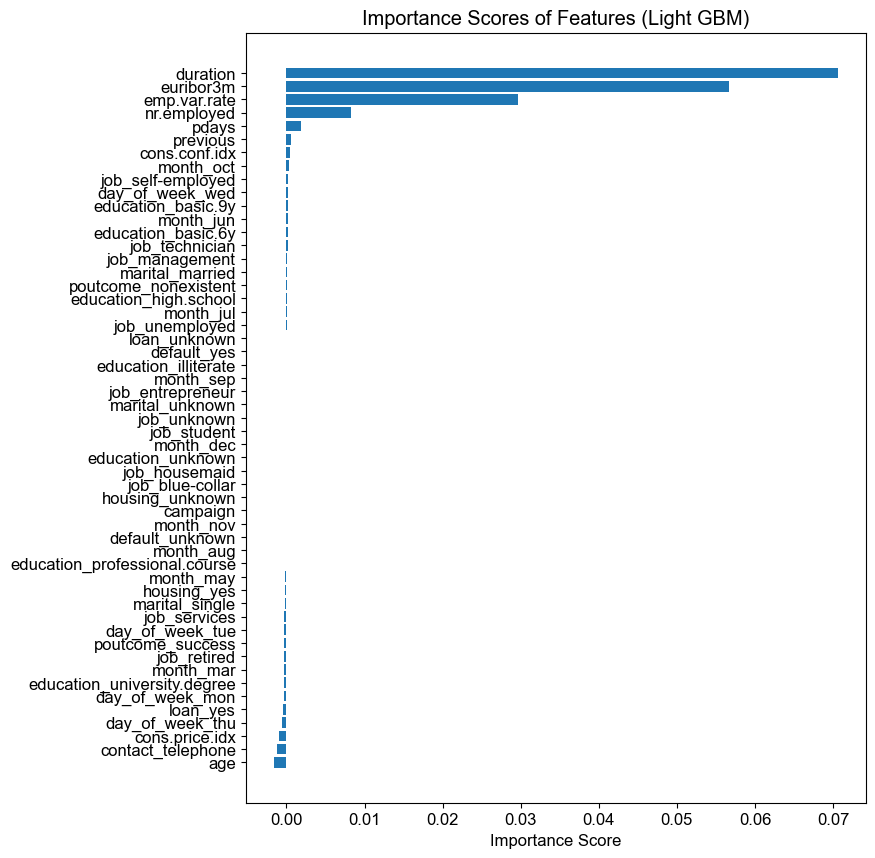

Top 10 Features by Permutation Importance:
duration: 0.0706
euribor3m: 0.0567
emp.var.rate: 0.0296
nr.employed: 0.0083
pdays: 0.0019
previous: 0.0006
cons.conf.idx: 0.0004
month_oct: 0.0003
job_self-employed: 0.0003
day_of_week_wed: 0.0003


In [16]:
# Calculate permutation importance
n_repeats = 10
random_state = 42
results = permutation_importance(lgb_model, test_x, test_y, n_repeats=n_repeats, random_state=random_state)

# Get the importance score for each feature
importance_scores = results.importances_mean

# Sort the importance scores in descending order
sorted_idx = importance_scores.argsort()

# Create a horizontal bar plot
plt.figure(figsize=(8, 10))
plt.barh(range(len(importance_scores)), importance_scores[sorted_idx], align="center")
plt.yticks(range(len(importance_scores)), x.columns[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Importance Scores of Features (Light GBM)")
plt.show()

# Print top features
print("Top 10 Features by Permutation Importance:")
for idx in sorted_idx[-10:][::-1]:
    print(f"{test_x.columns[idx]}: {importance_scores[idx]:.4f}")

# Histogram based gradient boosting classifiction tree


CLASSIFICATION MATRIX
------------------------
hist_gbc Accuracy: 0.8501
hist_gbc Precision: 0.4245
hist_gbc Recall: 0.9296
hist_gbc F1-score: 0.5829



<Figure size 1000x1000 with 0 Axes>

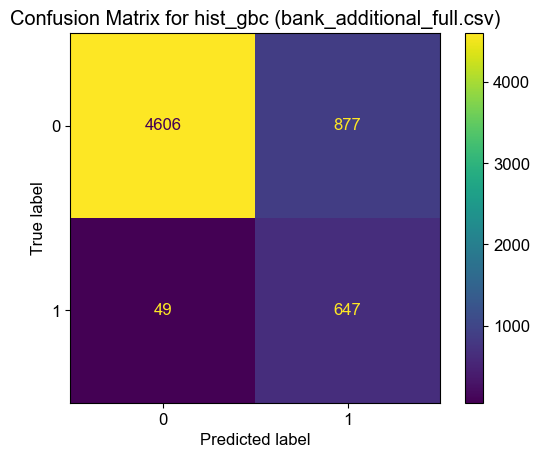

In [17]:
# Parameters
max_iter = 300        # Number of boosting iterations (trees)
learning_rate = 0.05  # Learning rate to control the contribution of each tree
max_depth = 3         # Maximum depth of the trees
random_state = 42     # For reproducibility
class_weight = 'balanced'  # To handle imbalanced dataset

# Define the model with custom hyperparameters
hist_gbc_model = HistGradientBoostingClassifier(
    max_iter=max_iter,
    learning_rate=learning_rate,
    max_depth=max_depth,
    class_weight=class_weight,
    random_state=random_state
)

# Fit to training set
hist_gbc_model.fit(train_x, train_y)

# Predict on test set
pred_y = hist_gbc_model.predict(test_x)

# Calculate evaluation metrics
hist_gbc_model_acc = accuracy_score(test_y, pred_y)
hist_gbc_model_precision = precision_score(test_y, pred_y, average='binary')
hist_gbc_model_recall = recall_score(test_y, pred_y, average='binary')
hist_gbc_model_f1 = f1_score(test_y, pred_y, average='binary')

# Store results in a list
result = [("hist_gbc Accuracy", hist_gbc_model_acc), ("hist_gbc Precision", hist_gbc_model_precision), ("hist_gbc Recall", hist_gbc_model_recall), ("hist_gbc F1-score", hist_gbc_model_f1)]

# Display results properly
print("\nCLASSIFICATION MATRIX")
print("------------------------")
for metric, value in result:
    print(f"{metric}: {value:.4f}")
print()

# Confusion matrix
cm = confusion_matrix(test_y, pred_y)

# Create and display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
display.plot()
plt.title('Confusion Matrix for hist_gbc (bank_additional_full.csv)')
plt.show()


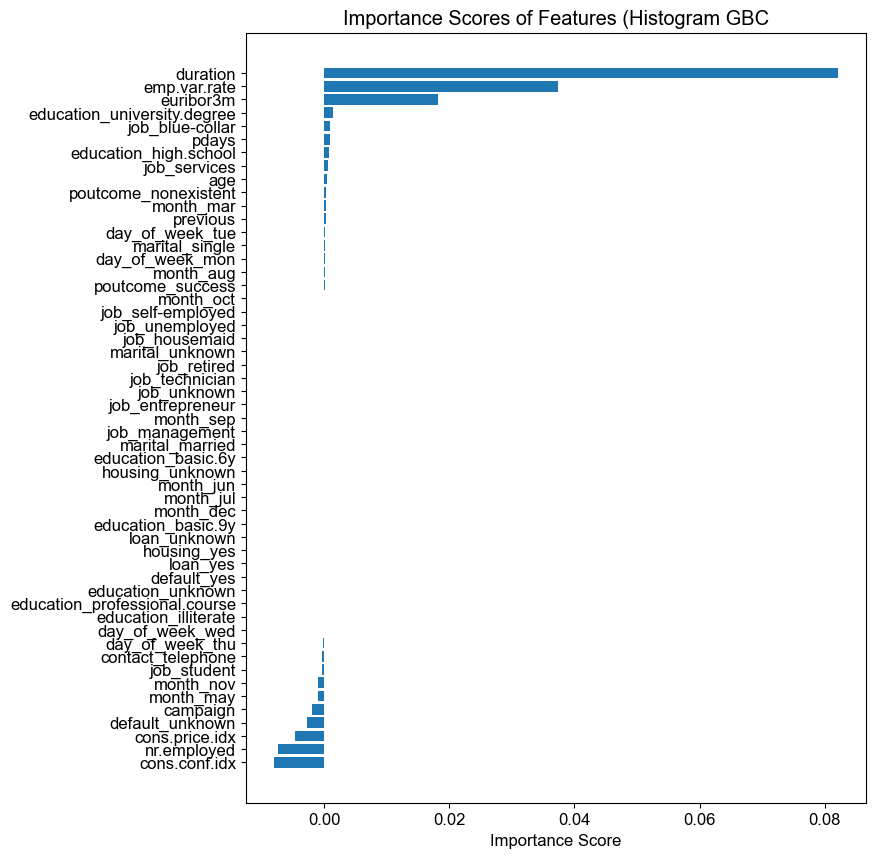

Top 10 Features by Permutation Importance:
duration: 0.0821
emp.var.rate: 0.0374
euribor3m: 0.0182
education_university.degree: 0.0014
job_blue-collar: 0.0009
pdays: 0.0009
education_high.school: 0.0008
job_services: 0.0007
age: 0.0005
poutcome_nonexistent: 0.0004


In [18]:
# Calculate permutation importance
n_repeats = 10
random_state = 42
results = permutation_importance(hist_gbc_model, test_x, test_y, n_repeats=n_repeats, random_state=random_state)

# Get the importance score for each feature
importance_scores = results.importances_mean

# Sort the importance scores in descending order
sorted_idx = importance_scores.argsort()

# Create a horizontal bar plot
plt.figure(figsize=(8, 10))
plt.barh(range(len(importance_scores)), importance_scores[sorted_idx], align="center")
plt.yticks(range(len(importance_scores)), x.columns[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Importance Scores of Features (Histogram GBC")
plt.show()

# Print top features
print("Top 10 Features by Permutation Importance:")
for idx in sorted_idx[-10:][::-1]:
    print(f"{test_x.columns[idx]}: {importance_scores[idx]:.4f}")

#  Extreme Gradient Boosting (XGBoost)

*General Parameters:*

- booster: Specifies the type of boosting model to use. Options: gbtree, gblinear, dart.
- silent: Controls verbosity. 0 means display messages, 1 means silent.
- nthread: Number of threads to use in training.

*Booster Parameters:*

- eta (learning_rate): Controls the learning rate or step size. Default: 0.3.
- max_depth: Maximum depth of a tree. Default: 6.
- min_child_weight: Minimum sum of instance weight (hessian) needed in a child. Default: 1.
- subsample: Fraction of samples used for each boosting round. Default: 1.
- colsample_bytree: Fraction of features used in each tree. Default: 1.
- colsample_bylevel: Fraction of features used per level. Default: 1.
- colsample_bynode: Fraction of features used per node. Default: 1.
- lambda (reg_lambda): L2 regularization on weights. Default: 1.
- alpha (reg_alpha): L1 regularization on weights. Default: 0.
- tree_method: Tree construction algorithm. Options: auto, exact, approx, hist, gpu_hist.
- grow_policy: Controls tree growth. Options: depthwise, lossguide.
- max_delta_step: Maximum delta step we allow each leaf output to be. Default: 0.
- scale_pos_weight: Controls the balance of positive and negative weights in imbalanced classes. Default: 1.

*Learning Task Parameters:*

- objective: Specifies the learning task and corresponding objective function. Options: reg:squarederror, binary:logistic, multi:softmax, etc.
- eval_metric: Evaluation metric(s) for validation data. Default: rmse.
- early_stopping_rounds: Activates early stopping if validation metric does not improve. Default: NULL.
- num_class: Number of classes for multi-class classification. Default: 0.

*Other Parameters:*

- n_estimators: Number of boosting rounds (trees). Default: 100.
- max_bin: Maximum number of bins for splitting the data. Default: 256.
- random_state (seed): Random seed for reproducibility. Default: 0.
- missing: Value to represent missing values. Default: NaN.


CLASSIFICATION MATRIX
------------------------
XGBoost Accuracy: 0.9129
XGBoost Precision: 0.5919
XGBoost recall: 0.7313
XGBoost f1: 0.6542



<Figure size 1000x1000 with 0 Axes>

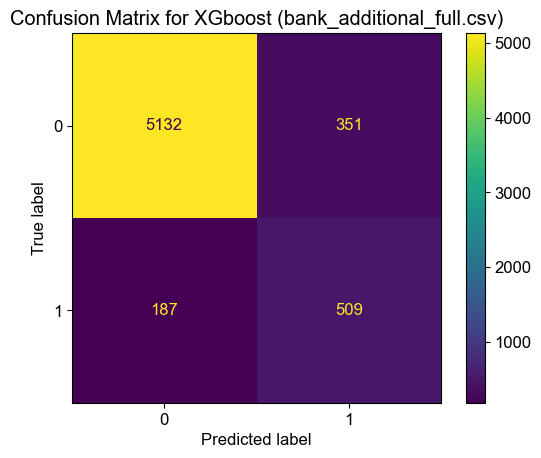

In [19]:
# Parameter
tree_method = 'approx' 
max_bin = 255
n_estimators = 300 # number of boosting round (trees)
scale_pos_weight = 2 # deal with imbalance data
learning_rate = 0.05
random_state = 42
eval_metric = "aucpr" #Evaluation metrics set to area under curve
reg_alpha = 1

xgb_model = XGBClassifier(tree_method=tree_method,
                          max_bin = max_bin,
                          n_estimators = n_estimators,
                          scale_pos_weight = scale_pos_weight,
                          learning_rate = learning_rate,
                          random_state = random_state,
                          eval_metric = eval_metric,
                          reg_alpha = reg_alpha
                         )

# fit the model on training data
xgb_model.fit(train_x, train_y)

# predict on test set
pred_y = xgb_model.predict(test_x)

# compute classification metrics
xgb_model_acc = accuracy_score(test_y, pred_y)
xgb_model_precision = precision_score(test_y, pred_y, average='binary')
xgb_model_recall = recall_score(test_y, pred_y, average='binary')
xgb_model_f1 = f1_score(test_y, pred_y, average='binary')

# store result to a list
result = [("XGBoost Accuracy", xgb_model_acc),
          ("XGBoost Precision", xgb_model_precision),
          ("XGBoost recall", xgb_model_recall),
          ("XGBoost f1", xgb_model_f1)]

# Display results properly
print("\nCLASSIFICATION MATRIX")
print("------------------------")
for metric, value in result:
    print(f"{metric}: {value:.4f}")
print()

# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)

# Create and display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
display.plot()
plt.title('Confusion Matrix for XGboost (bank_additional_full.csv)')
plt.show()


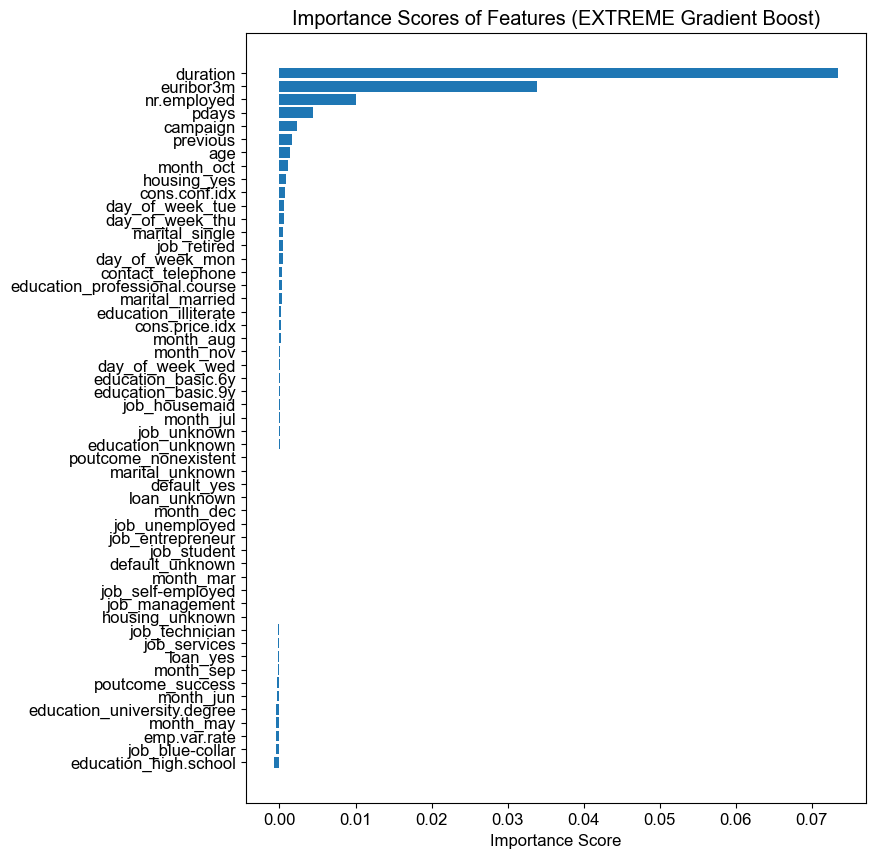

Top 10 Features by Permutation Importance:
duration: 0.0734
euribor3m: 0.0338
nr.employed: 0.0101
pdays: 0.0044
campaign: 0.0023
previous: 0.0016
age: 0.0014
month_oct: 0.0011
housing_yes: 0.0009
cons.conf.idx: 0.0007


In [20]:
# Calculate permutation importance
n_repeats = 10
random_state = 42
results = permutation_importance(xgb_model, test_x, test_y, n_repeats=n_repeats, random_state=random_state)

# Get the importance score for each feature
importance_scores = results.importances_mean

# Sort the importance scores in descending order
sorted_idx = importance_scores.argsort()

# Create a horizontal bar plot
plt.figure(figsize=(8, 10))
plt.barh(range(len(importance_scores)), importance_scores[sorted_idx], align="center")
plt.yticks(range(len(importance_scores)), x.columns[sorted_idx])
plt.xlabel("Importance Score")
plt.title("Importance Scores of Features (EXTREME Gradient Boost)")
plt.show()

# Print top features
print("Top 10 Features by Permutation Importance:")
for idx in sorted_idx[-10:][::-1]:
    print(f"{test_x.columns[idx]}: {importance_scores[idx]:.4f}")

# Matrix compariso  ( Accuracy, Precision, Recall, F1)

### 1. **Accuracy**
- **Definition**: Accuracy is the percentage of correct predictions made by the model out of all predictions.
  
- **Formula**:  
  $
  \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}
  $
- **Interpretation**: It is the most straightforward metric and gives a good idea of overall performance. However, accuracy can be misleading in imbalanced datasets, where the model could predict the majority class well but fail to identify the minority class.

### 2. **Precision**
- **Definition**: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. In other words, it answers the question: *Out of all instances the model classified as positive, how many were actually positive?*
  
- **Formula**:  
  $
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $
- **Interpretation**: High precision indicates that the model does not make many false positive errors. It is particularly useful in contexts where false positives are costly (e.g., email spam detection, medical diagnoses).

### 3. **Recall (Sensitivity)**
- **Definition**: Recall (or Sensitivity) is the ratio of correctly predicted positive observations to all actual positive observations. It answers the question: *Out of all actual positives, how many did the model identify?*
  
- **Formula**:  
  $
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $
- **Interpretation**: High recall indicates that the model successfully identifies most of the positive instances. Recall is important when missing positive instances (false negatives) is critical, such as in medical diagnoses where failing to detect a disease could have serious consequences.

### 4. **F1 Score**
- **Definition**: The F1 score is the harmonic mean of Precision and Recall. It provides a single score that balances both the precision and recall, giving a better measure of the model’s performance when dealing with imbalanced datasets.
  
- **Formula**:  
  $
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $
- **Interpretation**: The F1 score is particularly useful when you need a balance between precision and recall. A high F1 score means that both false positives and false negatives are low. It's especially useful when there is an uneven class distribution (e.g., when the minority class is more important to detect).

### Summary of Use:
- **Accuracy**: Best used when the dataset is balanced and all classes are equally important.
- **Precision**: Useful when the cost of false positives is high, and you want to be sure about positive predictions.
- **Recall**: Important when the cost of false negatives is high, and you want to catch as many positive instances as possible.
- **F1 Score**: Ideal when you need a balance between Precision and Recall, especially in cases with imbalanced datasets.


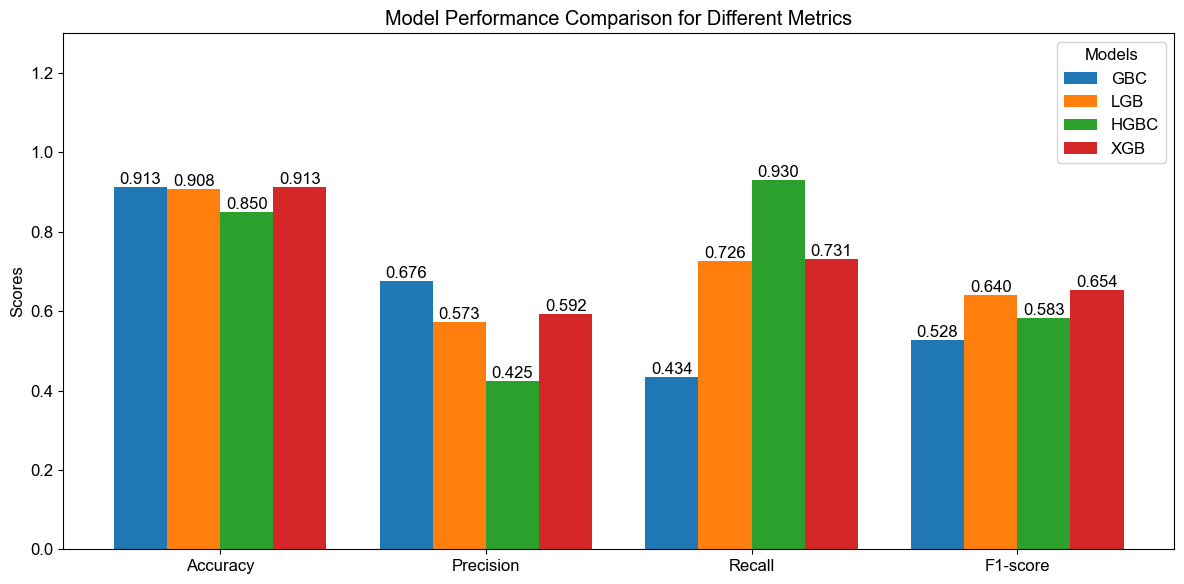

In [21]:
model_names = ['GBC', 'LGB', 'HGBC', 'XGB']
import numpy as np
import matplotlib.pyplot as plt

# Define the score variables for each model (make sure these variables are properly defined)
accuracy_scores = [gbc2_acc, lgb_model_acc, hist_gbc_model_acc, xgb_model_acc]
precision_scores = [gbc2_precision, lgb_model_precision, hist_gbc_model_precision, xgb_model_precision]
recall_scores = [gbc2_recall, lgb_model_recall, hist_gbc_model_recall, xgb_model_recall]
f1_scores = [gbc2_f1, lgb_model_f1, hist_gbc_model_f1, xgb_model_f1]

# Organize the scores for each metric in the same order
all_scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

# Define model names
model_names = ['GBC', 'LGB', 'HGBC', 'XGB']  # Model names

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Number of models
num_models = len(model_names)

# Positioning for the bars
x = np.arange(len(metrics))  # positions for each metric
width = 0.2  # bar width (adjusted for 4 models)

# Plot bars for each model
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted width for better spacing

# Colors for each model (GBC, LGB, HGBC, XGB)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Added color for XGB

# Loop over each model and plot each model's bars for the four metrics
for i, model in enumerate(model_names):
    ax.bar(x + (i - 1.5) * width, [all_scores[j][i] for j in range(len(metrics))], width, label=model, color=colors[i])

# Add numbers on top of each bar
for i in range(len(metrics)):
    for j in range(num_models):
        yval = all_scores[i][j]
        ax.text(x[i] + (j - 1.5) * width, yval, f'{yval:.3f}', ha='center', va='bottom')

# Set y-axis range
ax.set_ylim(0, 1.3)

# Adding labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison for Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Adding a legend with only model labels
ax.legend(title="Models")

# Show plot
plt.tight_layout()
plt.show()


# With Cross Validation


🔍 Running GridSearchCV for GBC...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
✅ Best params for GBC: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
📊 GBC Cross-Validation F1 Scores: [0.60293091 0.56410256 0.58536585 0.61600538 0.58118467]
📈 GBC Mean F1 Score: 0.5899 ± 0.0180

🔍 Running GridSearchCV for LGB...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Number of positive: 3944, number of negative: 31065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 35009, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112657 -> initscore=-2.063886
[LightGBM] [Info] Start training from score -2.063886
✅ Best params

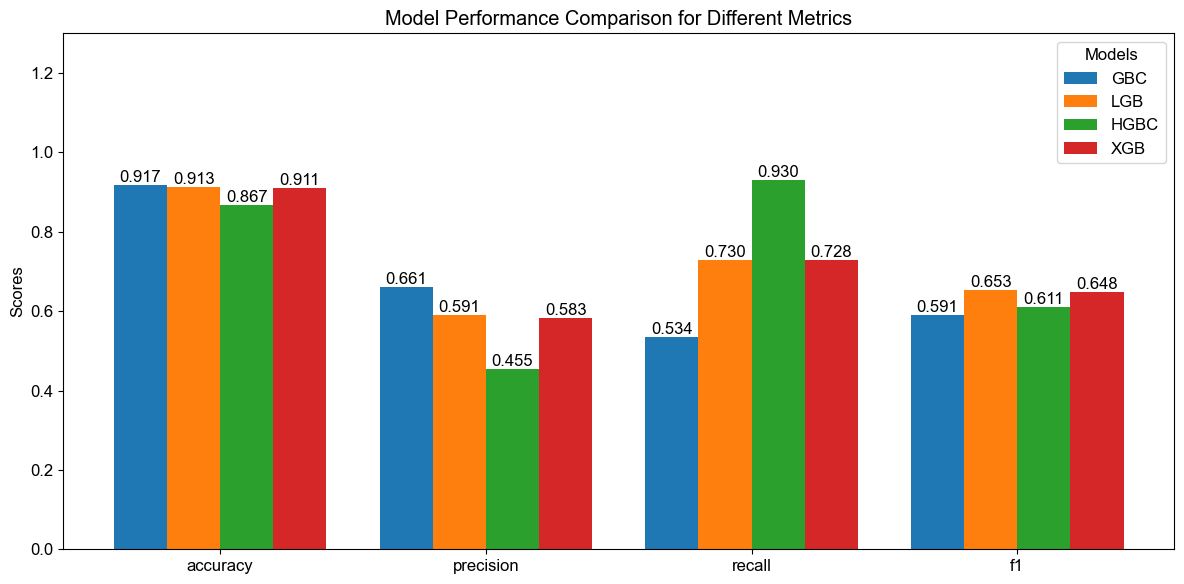

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model names
model_names = ['GBC', 'LGB', 'HGBC', 'XGB']

# Define classifiers
models = {
    'GBC': GradientBoostingClassifier(random_state=42),
    'LGB': LGBMClassifier(metric='auc', random_state=42),
    'HGBC': HistGradientBoostingClassifier(random_state=42),
    'XGB': XGBClassifier(eval_metric='aucpr', random_state=42)
}

# Define hyperparameter grids
param_grids = {
    'GBC': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'max_features': ['sqrt', 'log2']
    },
    'LGB': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [1, 2, 3, 4]
    },
    'HGBC': {
        'max_iter': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'class_weight': ['balanced', None]
    },
    'XGB': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [1, 2, 3, 4]
    }
}

# Store results
best_params = {}
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

for name, model in models.items():
    print(f"\n🔍 Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], scoring='f1', cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(train_x, train_y)
    
    best_params[name] = grid_search.best_params_
    print(f"✅ Best params for {name}: {grid_search.best_params_}")

    # Evaluate on test set
    best_model = grid_search.best_estimator_
    
    # Cross-validation on the best model
    cv_scores = cross_val_score(best_model, train_x, train_y, cv=kf, scoring='f1', n_jobs=-1)
    print(f"📊 {name} Cross-Validation F1 Scores: {cv_scores}")
    print(f"📈 {name} Mean F1 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Final test evaluation
    pred_y = best_model.predict(test_x)
    
    metrics['accuracy'].append(accuracy_score(test_y, pred_y))
    metrics['precision'].append(precision_score(test_y, pred_y))
    metrics['recall'].append(recall_score(test_y, pred_y))
    metrics['f1'].append(f1_score(test_y, pred_y))

# 🔹 Bar Chart Visualization
models_list = list(models.keys())
metric_names = list(metrics.keys())
num_models = len(models_list)
x = np.arange(len(metric_names))  # x-axis positions
width = 0.2  # bar width
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(models_list):
    ax.bar(x + (i - 1.5) * width, [metrics[m][i] for m in metric_names], width, label=model, color=colors[i])

for i in range(len(metric_names)):
    for j in range(num_models):
        yval = metrics[metric_names[i]][j]
        ax.text(x[i] + (j - 1.5) * width, yval, f'{yval:.3f}', ha='center', va='bottom')

ax.set_ylim(0, 1.3)
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison for Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend(title="Models")
plt.tight_layout()
plt.show()


# Fine tuning with hyperparameters using GridSearchCV

In [25]:
# Define hyperparameter grids
param_grids = {
    'GBC': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'max_features': ['sqrt', 'log2']
    },
    'LGB': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [1, 2, 3, 4]
    },
    'HGBC': {
        'max_iter': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'class_weight': ['balanced', None]
    },
    'XGB': {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [1, 2, 3, 4]
    }
}

# Define classifiers
models = {
    'GBC': GradientBoostingClassifier(random_state=42),
    'LGB': LGBMClassifier(metric='auc', random_state=42),
    'HGBC': HistGradientBoostingClassifier(random_state=42),
    'XGB': XGBClassifier(eval_metric='aucpr', random_state=42)
}

# Store results
best_params = {}
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Run GridSearchCV and evaluate models
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], scoring='f1', cv=3, n_jobs=-1, verbose=1) # i set cv to 3 because it takes a long time to run
    grid_search.fit(train_x, train_y)
    best_params[name] = grid_search.best_params_
    print(f"Best params for {name}: {grid_search.best_params_}")

    # Evaluate on test set
    best_model = grid_search.best_estimator_
    pred_y = best_model.predict(test_x)

    metrics['accuracy'].append(accuracy_score(test_y, pred_y))
    metrics['precision'].append(precision_score(test_y, pred_y))
    metrics['recall'].append(recall_score(test_y, pred_y))
    metrics['f1'].append(f1_score(test_y, pred_y))

Running GridSearchCV for GBC...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best params for GBC: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
Running GridSearchCV for LGB...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Number of positive: 3944, number of negative: 31065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 35009, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112657 -> initscore=-2.063886
[LightGBM] [Info] Start training from score -2.063886
Best params for LGB: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'scale_pos_weight': 2}
Running GridSearchCV for HGBC...
Fitting 3 f

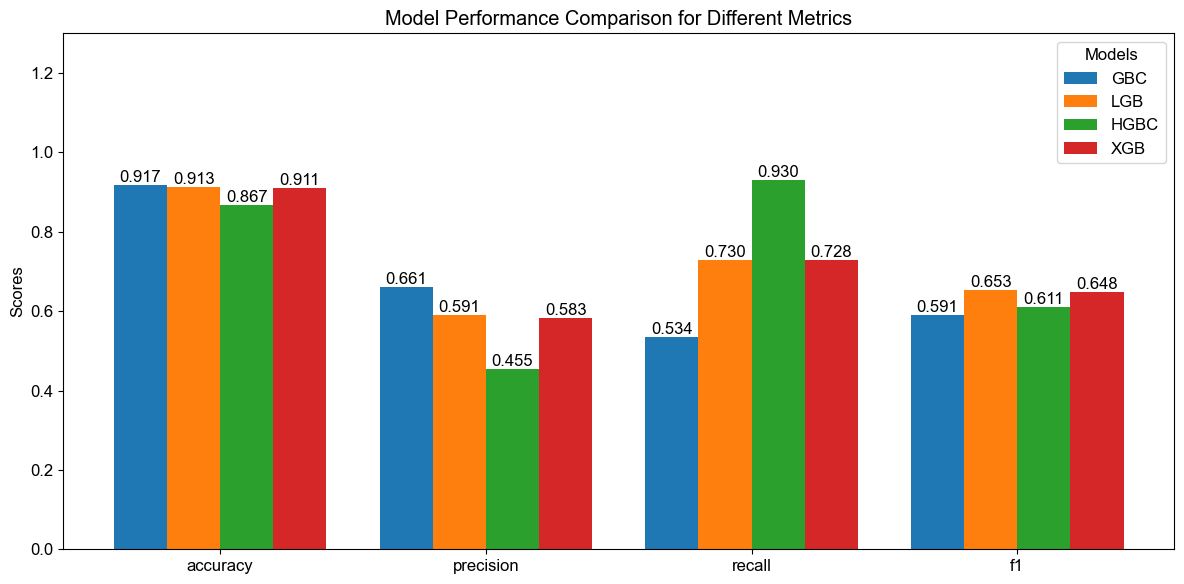

In [26]:
# Plot bar chart
models_list = list(models.keys())
metric_names = list(metrics.keys())
num_models = len(models_list)
x = np.arange(len(metric_names))  # x-axis positions
width = 0.2  # bar width
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(models_list):
    ax.bar(x + (i - 1.5) * width, [metrics[m][i] for m in metric_names], width, label=model, color=colors[i])

for i in range(len(metric_names)):
    for j in range(num_models):
        yval = metrics[metric_names[i]][j]
        ax.text(x[i] + (j - 1.5) * width, yval, f'{yval:.3f}', ha='center', va='bottom')

ax.set_ylim(0, 1.3)
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison for Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend(title="Models")
plt.tight_layout()
plt.show()